In [3]:
from keras.datasets import imdb #인터넷 영화 리뷰 50000개의 데이터 셋입니다. 긍정적인 리뷰 50%, 부정적인 리뷰 50%

In [4]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000) 
#빈도수 상위 10000개의 단어를 훈련과 테스트 데이터로 불러옵니다.

In [5]:
import numpy as np #고성능 과학계산 컴퓨팅을 하는 데이터 분석에 필요한 기본적인 패키지 입니다.

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension)) #크기가 (len(sequences),dimension)이고 모든 원소가 0인 행렬을 만듭니다.
    for i, sequence in enumerate(sequences): #enumerate : 몇 번째 반복문인지 확인할 때 사용합니다.
        results[i, sequence] = 1. #results[i]에서 특정 인덱스의 위치를 1로 만듭니다.
    return results

In [8]:
x_train = vectorize_sequences(train_data) #정수 시퀀스를 이진 행렬로 인코딩해줍니다.
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
from keras import models #models을 저장하고 불러옵니다.
from keras import layers #계층을 만들어 줍니다.

In [12]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,))) #10000개의 입력을 받는 3개의 층을 만듭니다.
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
from keras import optimizers #최적화함수를 불러옵니다.
from keras import losses #손실함수를 불러옵니다.
from keras import metrics

In [17]:
model.compile(optimizer = optimizers.RMSprop(lr=0.001), #RMSprop으로 최적화 해줍니다
             loss=losses.binary_crossentropy, #이진분류 문제이기 때문에 손실함수로 binary crossentropy를 지정 해줍니다.
             metrics=[metrics.binary_accuracy])

In [18]:
x_val = x_train[:10000] #처음 본 데이터에 대한 모델의 정확도를 측정하기 위해 검증 세트를 만들어줍니다.
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 5, 
                   batch_size = 512, #512배치 사이즈로 5번 반복해줍니다.
                   validation_data=(x_val,y_val)) 

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 231s 15ms/step - loss: 0.1510 - binary_accuracy: 0.9431 - val_loss: 0.1600 - val_binary_accuracy: 0.9410
Epoch 2/5
15000/15000 [==============================] - 8s 564us/step - loss: 0.1132 - binary_accuracy: 0.9630 - val_loss: 0.1569 - val_binary_accuracy: 0.9423
Epoch 3/5
15000/15000 [==============================] - 7s 491us/step - loss: 0.0963 - binary_accuracy: 0.9693 - val_loss: 0.1903 - val_binary_accuracy: 0.9287
Epoch 4/5
15000/15000 [==============================] - 7s 468us/step - loss: 0.0792 - binary_accuracy: 0.9764 - val_loss: 0.2203 - val_binary_accuracy: 0.9190
Epoch 5/5
15000/15000 [==============================] - 7s 448us/step - loss: 0.0673 - binary_accuracy: 0.9812 - val_loss: 0.2908 - val_binary_accuracy: 0.8955


In [20]:
history_dict = history.history #딕셔너리를 만들어줍니다.
history_dict.keys()

dict_keys(['val_loss', 'loss', 'binary_accuracy', 'val_binary_accuracy'])

In [21]:
import matplotlib.pyplot as plt #그래프 시각화 라이브러리입니다.

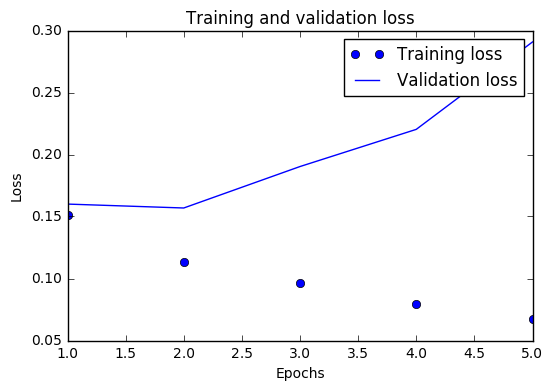

In [22]:
history_dict = history.history #훈련과 검증 손실 그래프를 그려줍니다.
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

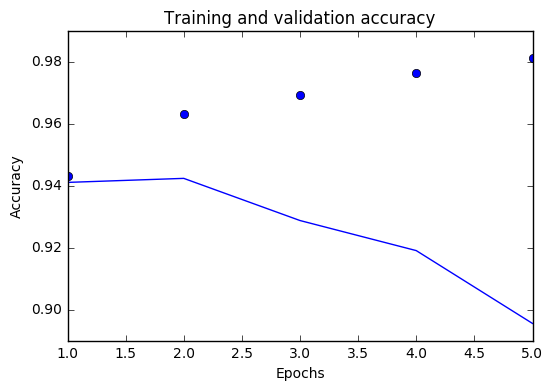

In [23]:
plt.clf() #그래프를 초기화합니다.
acc = history_dict['binary_accuracy'] #훈련과 검증 정확도를 그려줍니다.
val_acc = history_dict['val_binary_accuracy']
plt.plot(epochs, acc,'bo',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [24]:
x_train2 = vectorize_sequences(train_data) #정수 시퀀스를 이진 행렬로 인코딩해줍니다.
x_test2 = vectorize_sequences(test_data)
y_train2 = np.asarray(train_labels).astype('float32')
y_test2 = np.asarray(test_labels).astype('float32')